# Homework Starter — Stclose 08 EDA

Fill in the marked TODOs. This notebook generates synthetic data so you can focus on the EDA flow. Replace with your dataset when ready.

In [3]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from scipy.stats import skew, kurtosis
sns.set(context='talk', style='whitegrid')
np.random.seed(8)
pd.set_option('display.max_columns', 100)

df = pd.read_csv('my_data.csv')

df.head()

,date,close,open,high,low,volume
0,2024-08-19,224.843582,224.674371,224.943125,222.006778,40687800
1,2024-08-20,225.460693,224.724131,226.117640,224.405606,30299000
2,2024-08-21,225.351212,225.470666,226.923894,224.007474,34765500
3,2024-08-22,223.489868,226.734761,227.282216,222.862782,43695300
4,2024-08-23,225.789154,224.614628,227.162766,223.290787,38677300


## 1) First look

In [4]:
df.info(), df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    250 non-null    object 
 1   close   250 non-null    float64
 2   open    250 non-null    float64
 3   high    250 non-null    float64
 4   low     250 non-null    float64
 5   volume  250 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 11.8+ KB


(None,
 date      0
 close     0
 open      0
 high      0
 low       0
 volume    0
 dtype: int64)

## 2) Numeric profile

In [6]:
desc = df[['open','close','high','low','volume']].describe().T
desc['skew'] = [skew(df[c].dropna()) for c in desc.index]
desc['kurtosis'] = [kurtosis(df[c].dropna()) for c in desc.index]
desc

,count,mean,std,min,25%,50%,75%,max,skew,kurtosis
open,250.0,2.213036e+02,1.595147e+01,1.715301e+02,2.097345e+02,2.233618e+02,2.321844e+02,2.572767e+02,-0.141263,-0.341501
close,250.0,2.215795e+02,1.598124e+01,1.719990e+02,2.097744e+02,2.233901e+02,2.322521e+02,2.581037e+02,-0.103315,-0.457653
high,250.0,2.238238e+02,1.549066e+01,1.898752e+02,2.117637e+02,2.250459e+02,2.342227e+02,2.591799e+02,0.028364,-0.764142
low,250.0,2.190364e+02,1.619692e+01,1.687968e+02,2.075787e+02,2.207992e+02,2.294241e+02,2.567187e+02,-0.206873,-0.172088
volume,250.0,5.383443e+07,2.775588e+07,2.323470e+07,3.948688e+07,4.674245e+07,5.665270e+07,3.186799e+08,4.678770,34.831873


## 3) Distributions (TODO: add at least 3)

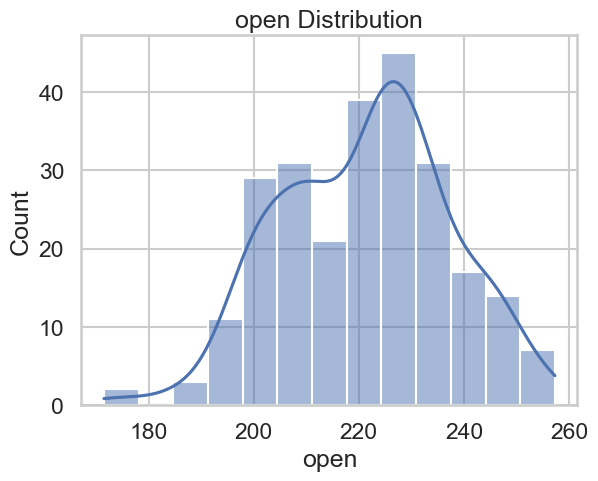

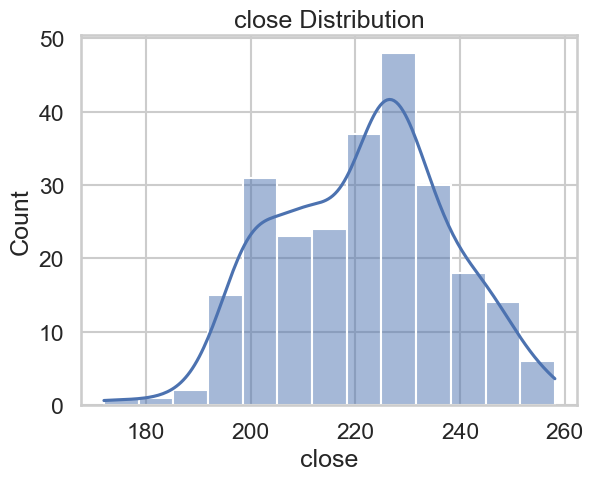

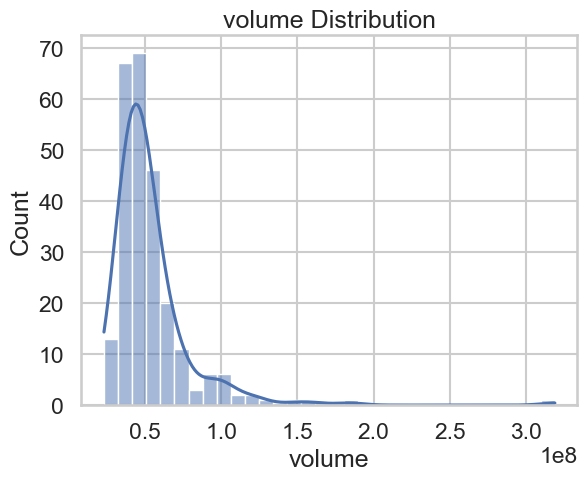

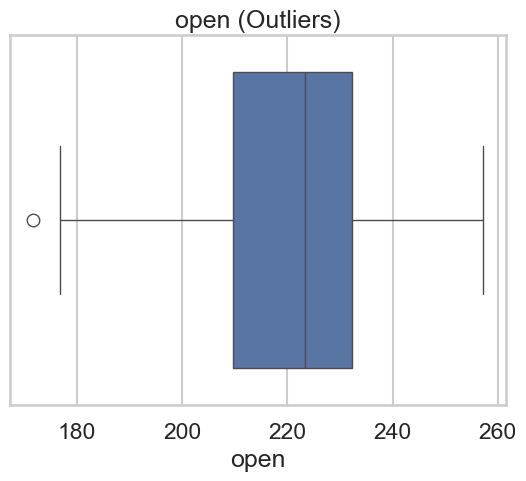

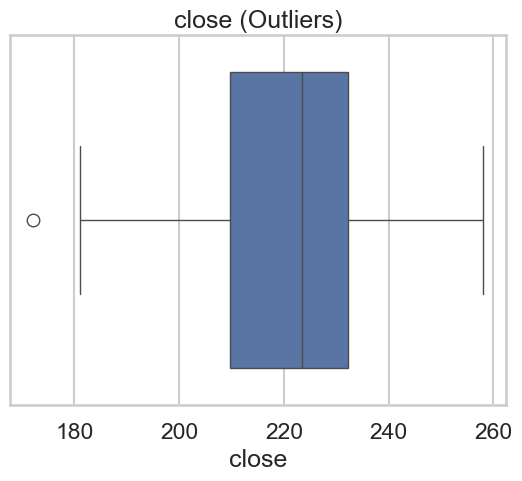

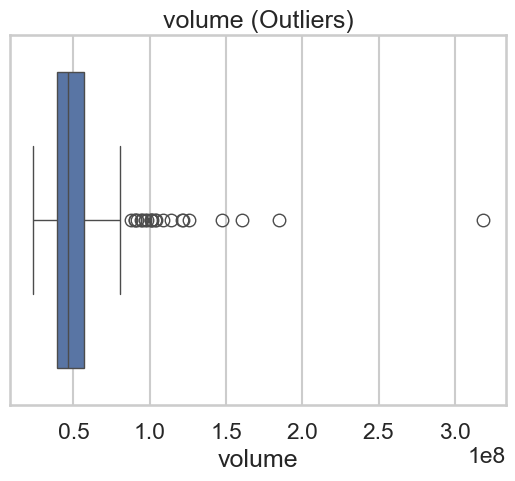

In [7]:
# TODO: histogram + KDE for a key variable
sns.histplot(df['open'], kde=True)
plt.title('open Distribution')
plt.show()

sns.histplot(df['close'], kde=True)
plt.title('close Distribution')
plt.show()

sns.histplot(df['volume'], kde=True)
plt.title('volume Distribution')
plt.show()

# TODO: boxplot for outliers
sns.boxplot(x=df['open'])
plt.title('open (Outliers)')
plt.show()

# TODO: boxplot for outliers
sns.boxplot(x=df['close'])
plt.title('close (Outliers)')
plt.show()

# TODO: boxplot for outliers
sns.boxplot(x=df['volume'])
plt.title('volume (Outliers)')
plt.show()

## 4) Relationships (TODO: add at least 2)

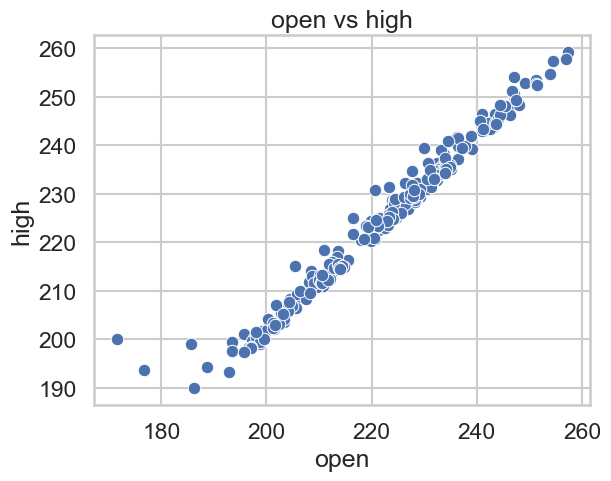

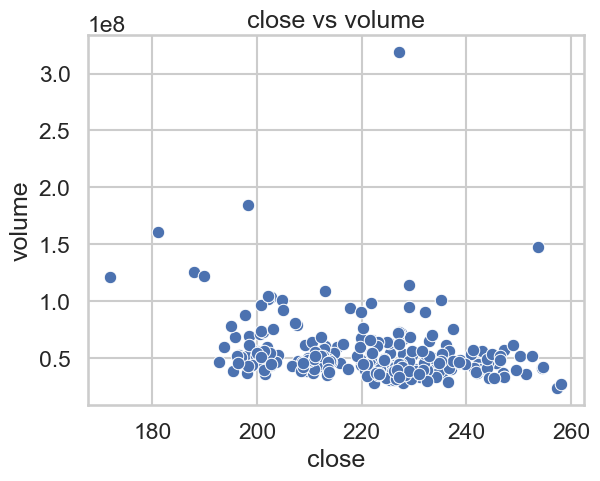

In [13]:
sns.scatterplot(data=df, x='open', y='high')
plt.title('open vs high')
plt.show()

sns.scatterplot(data=df, x='close', y='volume')
plt.title('close vs volume')
plt.show()

## 5) (Optional) Correlation matrix

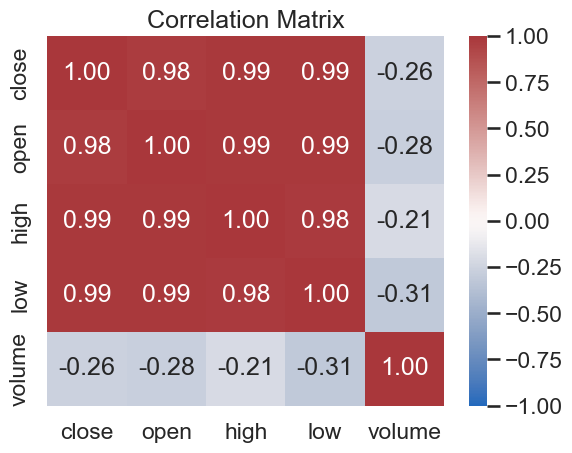

,close,open,high,low,volume
close,1.000000,0.976296,0.989551,0.988805,-0.260203
open,0.976296,1.000000,0.985637,0.989684,-0.279061
high,0.989551,0.985637,1.000000,0.982733,-0.206679
low,0.988805,0.989684,0.982733,1.000000,-0.314734
volume,-0.260203,-0.279061,-0.206679,-0.314734,1.000000


In [14]:
corr = df[['close','open','high', 'low','volume']].corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt='.2f', cmap='vlag', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()
corr

## 6) Insights & Assumptions (write your commentary)
- TODO: Top 3 insights
- TODO: Assumptions & risks
- TODO: Next steps before modeling (cleaning & features)

In [15]:
"""
Insights:

1. Intra-day price would generally not fluctuate much, therefore, open/close/high/low prices at the same day are highly correlated.
2. It is more likely for the trading volume to rise in case of the price falling - being a really unexpected (and not so strong) correlation.
3. Trading volume appear to have several outliers, probably showing few trading days that are really busy - or important.

Assumptions and risks:

1. Outliers (of volume) can not be removed, as the features/indicators explored at those days might be important for predicting movement of stocks.
2. It is safe to assume that the price would not generally change a lot within a day statistically.
3. Also, most of the volumes would be around 50 billion, however, those days with volumes abruptly exceeding the range are also important.

"""

'\nInsights:\n\n1. Intra-day price would generally not fluctuate much, therefore, open/close/high/low prices at the same day are highly correlated.\n2. It is more likely for the trading volume to rise in case of the price falling - being a really unexpected (and not so strong) correlation.\n3. Trading volume appear to have several outliers, probably showing few trading days that are really busy - or important.\n\nAssumptions and risks:\n\n1. Outliers (of volume) can not be removed, as the features/indicators explored at those days might be important for predicting movement of stocks.\n2. It is safe to assume that the price would not generally change a lot within a day statistically.\n3. Also, most of the volumes would be around 50 billion, however, those days with volumes abruptly exceeding the range are also important.\n\n'